<a href="https://colab.research.google.com/github/chandini-creator/03-03_PDS_ASSIGNMENT_1/blob/main/Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 2

Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Create folder structure

 This is responsible for creating a structured folder hierarchy for organizing files related to the Student Performance dataset.

In [2]:
base_dir = "student_performance"
os.makedirs(base_dir, exist_ok=True)
os.makedirs(os.path.join(base_dir, "data"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "processed"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "results"), exist_ok=True)

In [3]:
print("Created folder structure:")
for root, dirs, files in os.walk(base_dir):
    print(root)  # Print directory path
    for d in dirs:
        print("  |--", d)

Created folder structure:
student_performance
  |-- results
  |-- processed
  |-- data
student_performance/results
student_performance/processed
student_performance/data


Loading Dataset

In [8]:
from google.colab import files

uploaded = files.upload()  # Upload a CSV file manually
df = pd.read_csv(next(iter(uploaded)))  # Load the first uploaded file



Saving StudentsPerformance.csv to StudentsPerformance (1).csv


In [9]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


Saving raw data

In [10]:
df.to_csv(os.path.join(base_dir, "data", "student_performance.csv"), index=False)
print("Dataset downloaded and saved.")

Dataset downloaded and saved.


In [11]:
print(os.listdir(os.path.join(base_dir, "data")))

['student_performance.csv']


Data processing (Handling missing values)

In [12]:
df = df.dropna()
df.to_csv(os.path.join(base_dir, "processed", "student_performance_processed.csv"), index=False)
print("Data processing completed.")

Data processing completed.


In [13]:
print(os.listdir(os.path.join(base_dir, "processed")))

['student_performance_processed.csv']


Data Visualization

1.Histogram of Math Scores

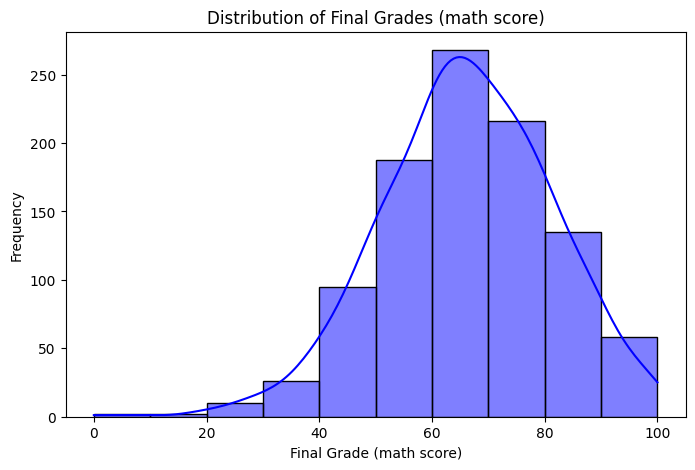

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df["math score"], bins=10, kde=True, color='blue')  # Use sns.histplot(), NOT plt.histplot()
plt.title("Distribution of Final Grades (math score)")
plt.xlabel("Final Grade (math score)")
plt.ylabel("Frequency")
plt.savefig(os.path.join(base_dir, "results", "histogram_grades.png"))
plt.show()

2.Box plot of final grades

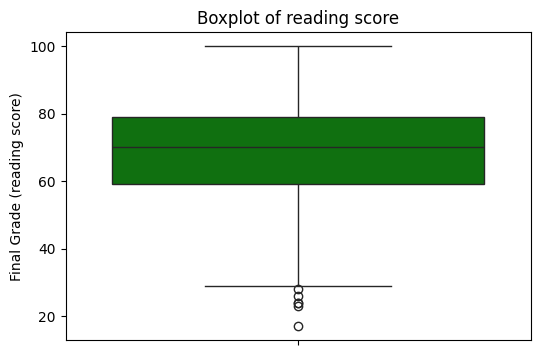

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["reading score"], color='green')
plt.title("Boxplot of reading score")
plt.ylabel("Final Grade (reading score)")
plt.savefig(os.path.join(base_dir, "results", "boxplot_grades.png"))
plt.show()

3. Scatter plot between reading score and writing score

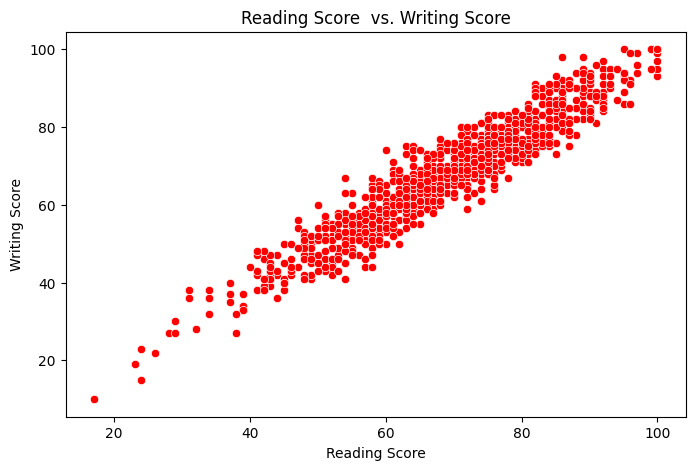

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["reading score"], y=df["writing score"], color='red')
plt.title("Reading Score  vs. Writing Score")
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.savefig(os.path.join(base_dir, "results", "scatter_grades.png"))
plt.show()

4.Bar chart of parental education level vs. grades

<ipython-input-27-2cbabdff7fbd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["parental level of education"], y=df["math score"], palette="coolwarm",legend=False)


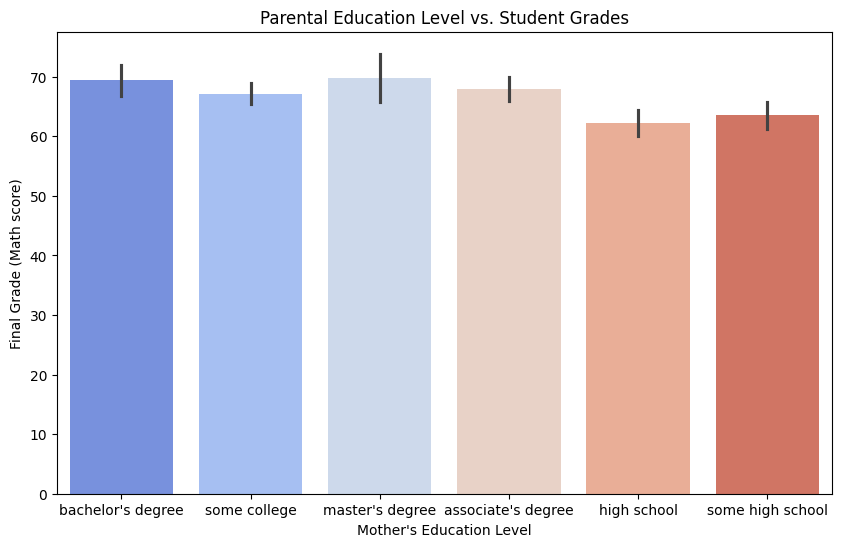

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df["parental level of education"], y=df["math score"], palette="coolwarm",legend=False)
plt.title("Parental Education Level vs. Student Grades")
plt.xlabel("Mother's Education Level")
plt.ylabel("Final Grade (Math score)")
plt.savefig(os.path.join(base_dir, "results", "bar_medu_grades.png"))
plt.show()

5.Heatmap of correlations between different attributes

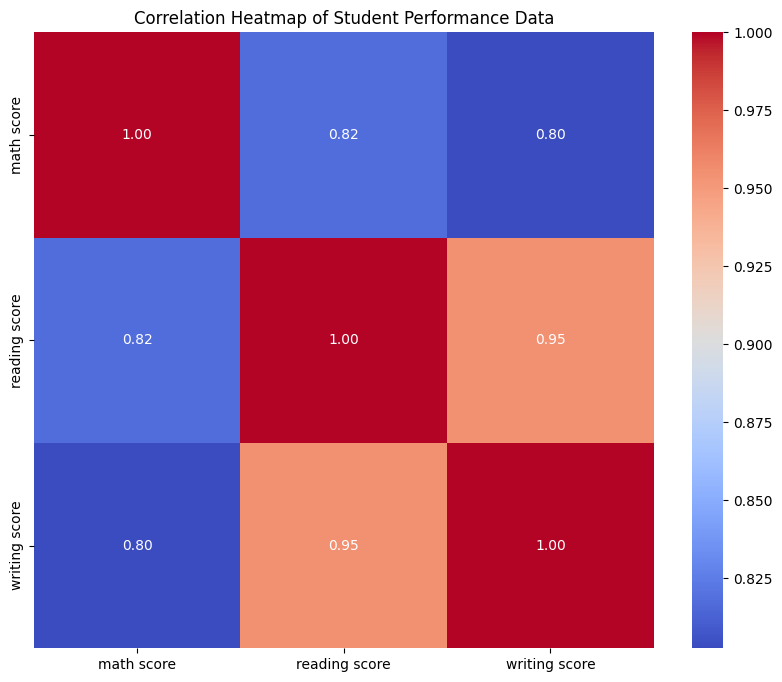

In [29]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Student Performance Data")
plt.savefig(os.path.join(base_dir, "results", "heatmap_correlation.png"))
plt.show()


The five visualizations in the analysis provide valuable insights into student performance. The histogram helps understand the distribution of math scores, identifying trends and outliers that indicate whether most students perform well or struggle.

The boxplot showcases the spread of reading scores, highlighting variations and extreme values that can signal disparities in performance. The scatter plot between reading and writing scores reveals the relationship between these skills, showing whether strong reading abilities translate into better writing performance.

The bar chart examining parental education vs. math scores demonstrates the impact of family background on academic success, suggesting that students with more educated parents may perform better. Finally, the heatmap illustrates correlations between different variables, such as study time, parental education, and scores, helping to pinpoint which factors most strongly influence student outcomes.

 Together, these visualizations simplify the process of identifying trends, relationships, and areas requiring academic intervention, making data-driven decision-making more effective.